In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
print(df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','PassengerId'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Cabin        8494 non-null   object 
 3   Destination  8511 non-null   object 
 4   Age          8514 non-null   float64
 5   VIP          8490 non-null   object 
 6   Name         8493 non-null   object 
 7   Transported  8693 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 484.0+ KB


In [7]:
def extract_starting(value):
    if isinstance(value, str):
        return value.split('/')[0]
    else:
        return None

# Extracting last values
def extract_last(value):
    if isinstance(value, str):
        return value.split('/')[-1]
    else:
        return None

df['Starting'] = df['Cabin'].apply(extract_starting)
df['Last'] = df['Cabin'].apply(extract_last)

# Unique last values
unique_last_values = df['Last'].unique()
print(unique_last_values)

# Unique starting values
unique_starting_values = df['Starting'].unique()
print(unique_starting_values)

['P' 'S' None]
['B' 'F' 'A' 'G' None 'E' 'D' 'C' 'T']


In [8]:
def create_new_feature(value):
    if isinstance(value, str):
        parts = value.split('/')
        first = parts[0][0]  # Take only the first character of the first value
        last = parts[-1]     # Take the last value
        return first + last
    else:
        return None

df['Cabin'] = df['Cabin'].apply(create_new_feature)

print(df)
df['Cabin'].nunique()

     HomePlanet CryoSleep Cabin    Destination   Age    VIP  \
0        Europa     False    BP    TRAPPIST-1e  39.0  False   
1         Earth     False    FS    TRAPPIST-1e  24.0  False   
2        Europa     False    AS    TRAPPIST-1e  58.0   True   
3        Europa     False    AS    TRAPPIST-1e  33.0  False   
4         Earth     False    FS    TRAPPIST-1e  16.0  False   
...         ...       ...   ...            ...   ...    ...   
8688     Europa     False    AP    55 Cancri e  41.0   True   
8689      Earth      True    GS  PSO J318.5-22  18.0  False   
8690      Earth     False    GS    TRAPPIST-1e  26.0  False   
8691     Europa     False    ES    55 Cancri e  32.0  False   
8692     Europa     False    ES    TRAPPIST-1e  44.0  False   

                   Name  Transported Starting Last  
0       Maham Ofracculy        False        B    P  
1          Juanna Vines         True        F    S  
2         Altark Susent        False        A    S  
3          Solam Susent        

16

In [9]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Starting,Last
0,Europa,False,BP,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,P
1,Earth,False,FS,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,S
2,Europa,False,AS,TRAPPIST-1e,58.0,True,Altark Susent,False,A,S
3,Europa,False,AS,TRAPPIST-1e,33.0,False,Solam Susent,False,A,S
4,Earth,False,FS,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,S


In [10]:

# df.dropna(subset=['CryoSleep'], inplace=True)
# df.dropna(subset=['HomePlanet'], inplace=True)
# df.dropna(subset=['VIP'], inplace=True)
# df.dropna(subset=['Destination'], inplace=True)
# df.dropna(subset=['Age'], inplace=True)

In [11]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['VIP'] = label_encoder.fit_transform(df['VIP'])
df['CryoSleep'] = label_encoder.fit_transform(df['CryoSleep'])
df['HomePlanet']=label_encoder.fit_transform(df['HomePlanet'])
df['Destination']=label_encoder.fit_transform(df['Destination'])
df['Cabin']=label_encoder.fit_transform(df['Cabin'])


In [12]:
# df['VIP']=df['VIP'].replace(0,df['VIP'].median())
# df['HomePlanet']=df['HomePlanet'].replace(0,df['HomePlanet'].median())
# df['CryoSleep']=df['CryoSleep'].replace(0,df['CryoSleep'].median())

In [13]:
print(df['HomePlanet'].unique())
print(df['CryoSleep'].unique())
print(df['Destination'].unique())
print(df['Cabin'].unique())
print(df['VIP'].unique())

[1 0 2 3]
[0 1 2]
[2 1 0 3]
[ 2 11  1 10 13 16 12  9  6  5  4  7  3  0  8 14 15]
[0 1 2]


In [14]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Starting,Last
0,1,0,2,2,39.0,0,Maham Ofracculy,False,B,P
1,0,0,11,2,24.0,0,Juanna Vines,True,F,S
2,1,0,1,2,58.0,1,Altark Susent,False,A,S
3,1,0,1,2,33.0,0,Solam Susent,False,A,S
4,0,0,11,2,16.0,0,Willy Santantines,True,F,S


In [15]:
df.isna().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age            179
VIP              0
Name           200
Transported      0
Starting       199
Last           199
dtype: int64

In [16]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lr=q1-(1.5*iqr)
rr=q3+(1.5*iqr)
outliers=len(df[(df['Age']<lr)|(df['Age']>rr)])
print(outliers)

77


In [17]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lr=q1-(1.5*iqr)
rr=q3+(1.5*iqr)
df=df[(df['Age']>=lr)&(df['Age']<=rr)]
df['Age']

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8437, dtype: float64

In [18]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['VIP']=df['VIP'].fillna(df['VIP'].mean())

In [19]:
df.isna().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
Name           195
Transported      0
Starting       191
Last           191
dtype: int64

In [20]:
df.drop(columns=['Name'],axis=1,inplace=True)
df=df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8246 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8246 non-null   int32  
 1   CryoSleep    8246 non-null   int32  
 2   Cabin        8246 non-null   int32  
 3   Destination  8246 non-null   int32  
 4   Age          8246 non-null   float64
 5   VIP          8246 non-null   int32  
 6   Transported  8246 non-null   bool   
 7   Starting     8246 non-null   object 
 8   Last         8246 non-null   object 
dtypes: bool(1), float64(1), int32(5), object(2)
memory usage: 426.8+ KB


<Axes: xlabel='Transported', ylabel='count'>

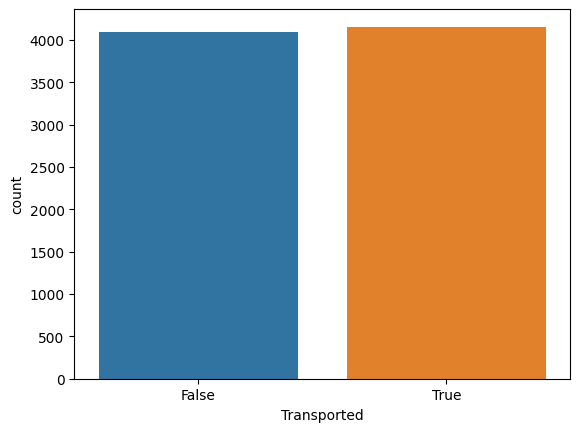

In [22]:
sns.countplot(x='Transported',data=df)

<Axes: xlabel='CryoSleep', ylabel='count'>

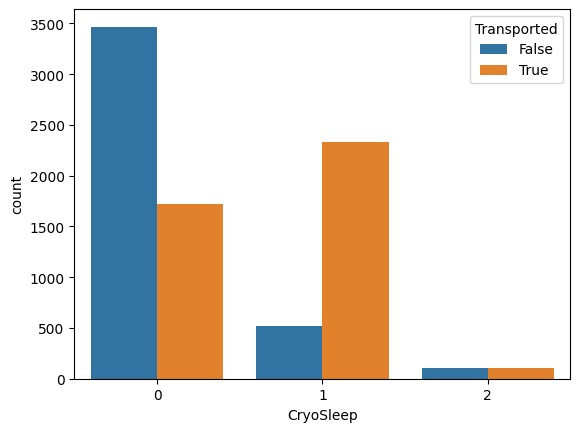

In [23]:
sns.countplot(x='CryoSleep',hue='Transported',data=df)

<Axes: xlabel='Cabin', ylabel='count'>

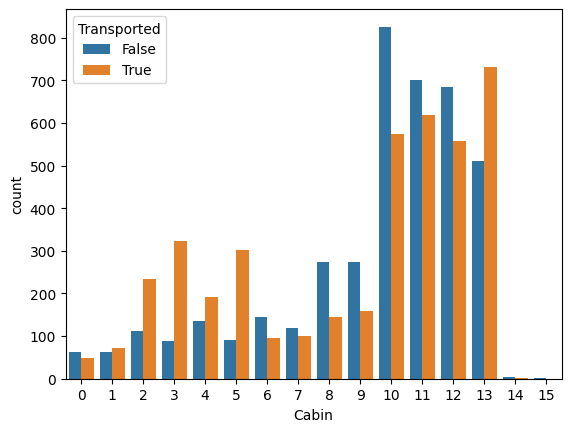

In [24]:
sns.countplot(x='Cabin',hue='Transported',data=df)

<Axes: xlabel='Destination', ylabel='count'>

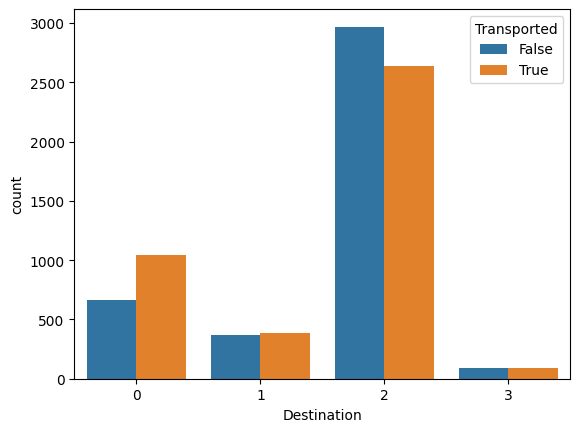

In [25]:
sns.countplot(x='Destination',hue='Transported',data=df)

<Axes: xlabel='Age', ylabel='count'>

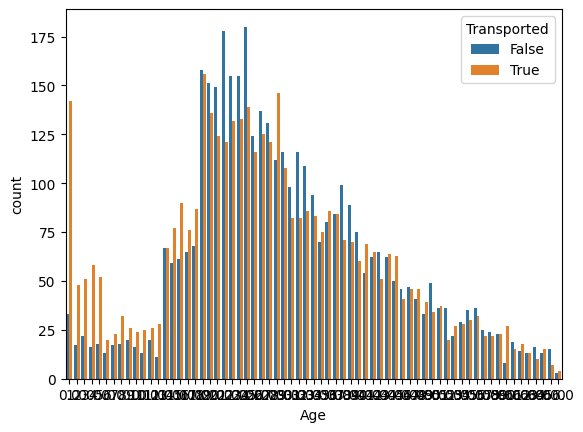

In [26]:
sns.countplot(x='Age',hue='Transported',data=df)

<Axes: xlabel='VIP', ylabel='count'>

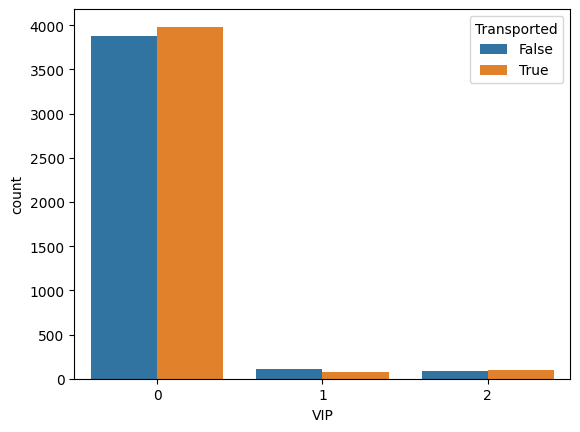

In [27]:
sns.countplot(x='VIP',hue='Transported',data=df)

In [28]:
x=df.drop(columns=['Transported'])
x.drop(columns=['Starting','Last'],inplace=True)
y=df['Transported']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
model=LogisticRegression()

In [32]:
model.fit(x,y)

LogisticRegression()

In [33]:
x_pred=model.predict(x)

In [34]:
x_pred

array([False, False, False, ..., False, False, False])

In [35]:
accuracy=accuracy_score(y,x_pred)
accuracy

0.7139219015280136

In [36]:
# y_pred=model.predict(x_test)
# y_acc=accuracy_score(y_test,y_pred)
# print(y_acc)

In [37]:
from sklearn.svm import SVC


In [69]:
md = SVC(kernel="rbf", gamma=0.5, C=1.0)
md.fit(x,y)

SVC(gamma=0.5)

In [70]:
x_val=md.predict(x)
acc=accuracy_score(x_val,y)
print(acc*100,'percent accurate your model' )


80.08731506184816 percent accurate your model


In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8246 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8246 non-null   int32  
 1   CryoSleep    8246 non-null   int32  
 2   Cabin        8246 non-null   int32  
 3   Destination  8246 non-null   int32  
 4   Age          8246 non-null   float64
 5   VIP          8246 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 289.9 KB


In [41]:
df2=pd.read_csv('test.csv')
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [42]:
xval=df2.drop(columns=['PassengerId','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'])

In [43]:
xval

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False
4274,Mars,True,D/296/P,55 Cancri e,NaN,False
4275,Europa,False,D/297/P,NaN,NaN,False


In [44]:
df.dropna(subset=['CryoSleep'], inplace=True)
df.dropna(subset=['HomePlanet'], inplace=True)
df.dropna(subset=['VIP'], inplace=True)
df.dropna(subset=['Destination'], inplace=True)
df.dropna(subset=['Age'], inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
xval['VIP'] = label_encoder.fit_transform(xval['VIP'])
xval['CryoSleep'] = label_encoder.fit_transform(xval['CryoSleep'])
xval['HomePlanet']=label_encoder.fit_transform(xval['HomePlanet'])
xval['Destination']=label_encoder.fit_transform(xval['Destination'])

In [46]:
xval

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0,1,G/3/S,2,27.0,0
1,0,0,F/4/S,2,19.0,0
2,1,1,C/0/S,0,31.0,0
3,1,0,C/1/S,2,38.0,0
4,0,0,F/5/S,2,20.0,0
...,...,...,...,...,...,...
4272,0,1,G/1496/S,2,34.0,0
4273,0,0,NaN,2,42.0,0
4274,2,1,D/296/P,0,NaN,0
4275,1,0,D/297/P,3,NaN,0


In [47]:
xval['Cabin'] = xval['Cabin'].apply(create_new_feature)

print(xval)
xval['Cabin'].nunique()

      HomePlanet  CryoSleep Cabin  Destination   Age  VIP
0              0          1    GS            2  27.0    0
1              0          0    FS            2  19.0    0
2              1          1    CS            0  31.0    0
3              1          0    CS            2  38.0    0
4              0          0    FS            2  20.0    0
...          ...        ...   ...          ...   ...  ...
4272           0          1    GS            2  34.0    0
4273           0          0  None            2  42.0    0
4274           2          1    DP            0   NaN    0
4275           1          0    DP            3   NaN    0
4276           0          1    GS            1  43.0    0

[4277 rows x 6 columns]


16

In [51]:
xval['Cabin']=label_encoder.fit_transform(xval['Cabin'])
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8246 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8246 non-null   int32  
 1   CryoSleep    8246 non-null   int32  
 2   Cabin        8246 non-null   int32  
 3   Destination  8246 non-null   int32  
 4   Age          8246 non-null   float64
 5   VIP          8246 non-null   int32  
dtypes: float64(1), int32(5)
memory usage: 289.9 KB


In [52]:
xval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   4277 non-null   int32  
 1   CryoSleep    4277 non-null   int32  
 2   Cabin        4277 non-null   int64  
 3   Destination  4277 non-null   int32  
 4   Age          4186 non-null   float64
 5   VIP          4277 non-null   int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 133.8 KB


In [53]:
xval['Age']=xval['Age'].fillna(xval['Age'].mean())

In [54]:
xval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   4277 non-null   int32  
 1   CryoSleep    4277 non-null   int32  
 2   Cabin        4277 non-null   int64  
 3   Destination  4277 non-null   int32  
 4   Age          4277 non-null   float64
 5   VIP          4277 non-null   int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 133.8 KB


In [59]:
y_pred

array([ True, False,  True, ...,  True,  True, False])

In [60]:
pred=pd.DataFrame({
    "PassengerId":df2['PassengerId'],
    "Transported":y_pred
})

In [65]:
pred.to_csv("Submission.csv",index=False)

In [66]:
data=pd.read_csv('Submission.csv')
data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [112]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf.fit(x, y)

DecisionTreeClassifier()

In [113]:
yx=tree_clf.predict(x)
print(accuracy_score(yx,y))

0.842590346834829


In [123]:
yx=tree_clf.predict(xval)

In [124]:
pred=pd.DataFrame({
    "PassengerId":df2['PassengerId'],
    "Transported":yx
})
pred.to_csv("Submission.csv",index=False)